In [6]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.ppg_filter import bandpass_filter


Load dữ liệu ESP32

In [8]:
df = pd.read_csv("../data/raw_ppg/example.csv")

t = df["Time"].values
ppg = df["PPG"].values


fs = 125
# t = df["time_ms"].values / 1000.0  # ms → s
# ppg = df["ppg"].values


Vẽ raw PPG

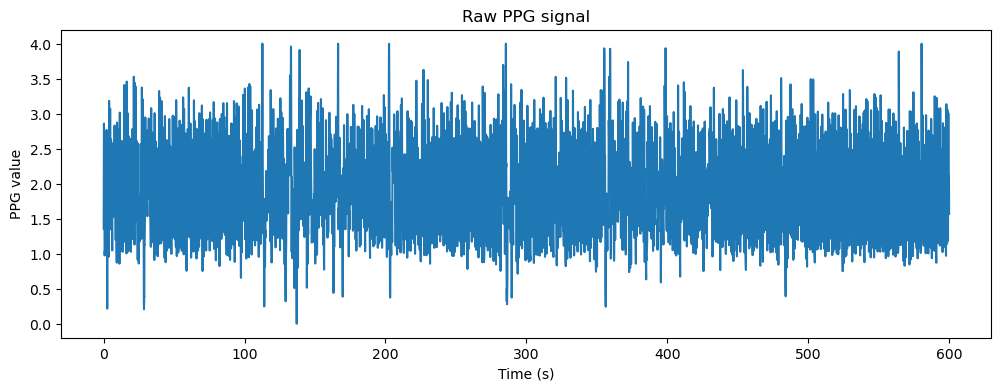

In [9]:
plt.figure(figsize=(12,4))
plt.plot(t, ppg)
plt.title("Raw PPG signal")
plt.xlabel("Time (s)")
plt.ylabel("PPG value")
plt.show()


Lọc PPG


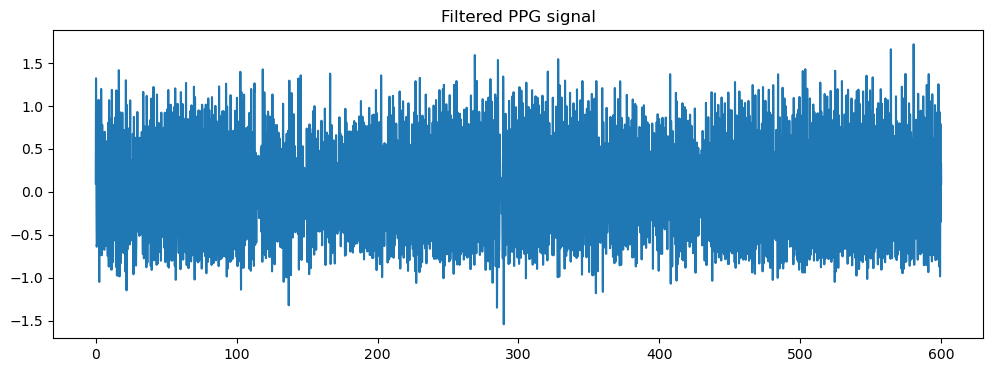

In [10]:
# fs = 100  # ESP32 delay(10) → ~100 Hz

from src.ppg_filter import bandpass_filter

ppg_filt = bandpass_filter(ppg, fs)

plt.figure(figsize=(12,4))
plt.plot(t, ppg_filt)
plt.title("Filtered PPG signal")
plt.show()


Detect peak


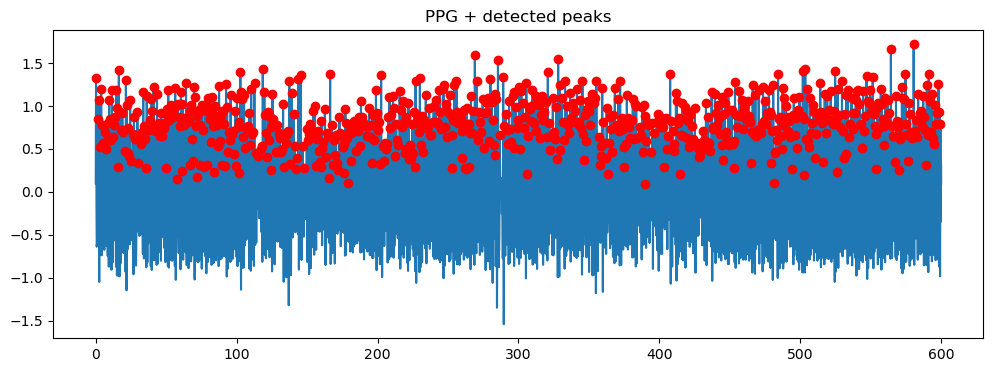

In [ ]:
from src.peak_detection import detect_peaks
from src.hrv import compute_rr, hrv_features

peaks = detect_peaks(ppg_filt, fs)

plt.figure(figsize=(12,4))
plt.plot(t, ppg_filt)
plt.plot(t[peaks], ppg_filt[peaks], "ro")
plt.title("PPG + detected peaks")
plt.show()


Mỗi chấm đỏ là 1 nhịp tim


tính nhịp tim HRV

In [12]:
from src.hrv import compute_rr, hrv_features

rr = compute_rr(peaks, fs)
features = hrv_features(rr)
features


{'HR': 79.10019357853281,
 'MeanRR': 0.7585316455696203,
 'SDNN': 0.2306348989062467,
 'RMSSD': 0.3097957297475794}